In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

## **Step 1: Reading diabetes dataset**

In [107]:
data = pd.read_csv("Diabetes_dataset.csv")
data = data.dropna()
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


## Taking X = BMI

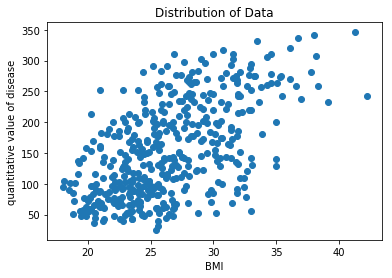

In [146]:
X = data.iloc[:,2]
Y = data.iloc[:,10]
plt.scatter(X, Y)
plt.title('Distribution of Data')
plt.xlabel('BMI')
plt.ylabel('quantitative value of disease')
plt.show()

## **Step 2: Test Train split**

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

## **Step 3: Inspect dataframe**

In [148]:
X_train.describe().transpose()

count    353.000000
mean      26.384986
std        4.415144
min       18.000000
25%       23.200000
50%       25.700000
75%       29.300000
max       42.200000
Name: BMI, dtype: float64

## **Step 4: Linear Regression y = mx + c for x = BMI**

**L = 0.01**
**epochs = 100**

In [149]:
m = 0
c = 0
losses = []
val_losses = []

L = 0.01  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n_train = float(len(X_train)) 
n_test = float(len(X_test))

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c 
    Y_val_pred = m*X_test + c  
    
    rmse = np.sqrt((1/n_train) * np.sum((Y_train - Y_pred)**2))
    losses.append(rmse)
    
    rmse_val = np.sqrt((1/n_test) * np.sum((Y_test - Y_val_pred)**2))
    val_losses.append(rmse_val)
    
    D_m = (-2/n_train) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n_train) * sum(Y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

-1.8251570929369228e+113 -6.729762798411494e+111


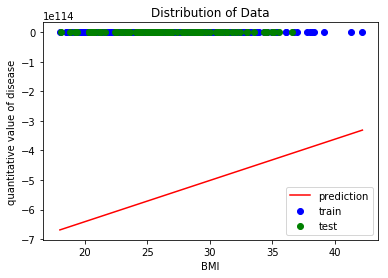

In [150]:
# Making predictions
Y_pred = m*X_test + c

plt.title('Distribution of Data')
plt.scatter(X_train, Y_train, color='blue', label='train')
plt.scatter(X_test, Y_test, color='green', label='test')
#plotting predicted line
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('quantitative value of disease')
plt.legend()
plt.show()

Initial loss value : 172.08754936337596
Final loss value : 3.6672947884861584e+113
Initial validation loss value : 164.11612085226577
Final validation loss value : 3.6615997813928306e+113


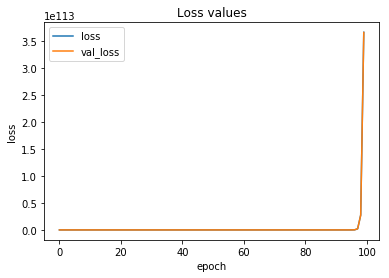

In [151]:
plt.title('Loss values')
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
print('Initial loss value :', losses[0])
print('Final loss value :', losses[-1])
print('Initial validation loss value :', val_losses[0])
print('Final validation loss value :', val_losses[-1])

**L = 0.001**
**epochs = 100**

In [152]:
m = 0
c = 0
losses = []
val_losses = [] 

L = 0.001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n_train = float(len(X_train)) # Number of elements in X
n_test = float(len(X_test))

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c  
    Y_val_pred = m*X_test + c  
    
    rmse = np.sqrt((1/n_train) * np.sum((Y_train - Y_pred)**2))
    losses.append(rmse)
    
    rmse_val = np.sqrt((1/n_test) * np.sum((Y_test - Y_val_pred)**2))
    val_losses.append(rmse_val)
    
    D_m = (-2/n_train) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n_train) * sum(Y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

5.954187983842797 -0.3973894577379742


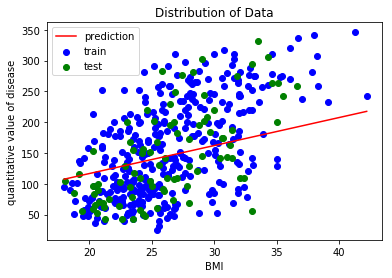

In [153]:
# Making predictions
Y_pred = m*X_test + c

plt.title('Distribution of Data')
plt.scatter(X_train, Y_train, color='blue', label='train')
plt.scatter(X_test, Y_test, color='green', label='test')
#plotting predicted line
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('quantitative value of disease')
plt.legend()
plt.show()

Initial loss value : 172.08754936337596
Final loss value : 66.06940241832648
Initial validation loss value : 164.11612085226577
Final validation loss value : 62.28955343713902


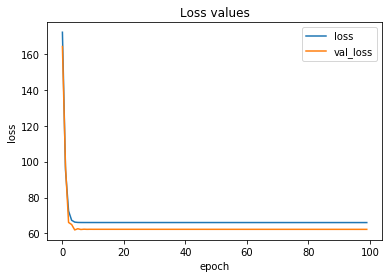

In [154]:
plt.title('Loss values')
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
print('Initial loss value :', losses[0])
print('Final loss value :', losses[-1])
print('Initial validation loss value :', val_losses[0])
print('Final validation loss value :', val_losses[-1])

**L = 0.0001 epochs = 100**

In [196]:
m = 0
c = 0
losses = []
val_losses = []

L = 0.0001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n_train = float(len(X_train)) # Number of elements in X
n_test = float(len(X_test))

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c  # The current predicted value of Y
    Y_val_pred = m*X_test + c  # The current predicted value of Y
    
    rmse = np.sqrt((1/n_train) * np.sum((Y_train - Y_pred)**2))
    losses.append(rmse)
    
    rmse_val = np.sqrt((1/n_test) * np.sum((Y_test - Y_val_pred)**2))
    val_losses.append(rmse_val)
    
    D_m = (-2/n_train) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n_train) * sum(Y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

5.9337471853706845 0.15694795189566327


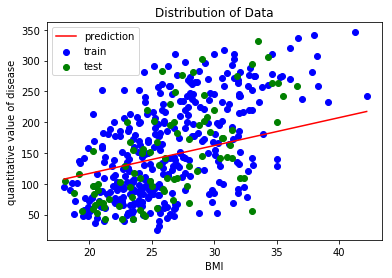

In [197]:
# Making predictions
Y_pred = m*X_test + c

plt.title('Distribution of Data')
plt.scatter(X_train, Y_train, color='blue', label='train')
plt.scatter(X_test, Y_test, color='green', label='test')
#plotting predicted line
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('quantitative value of disease')
plt.legend()
plt.show()

Initial loss value : 172.08754936337596
Final loss value : 66.09501364752765
Initial validation loss value : 164.11612085226577
Final validation loss value : 62.321987391833815


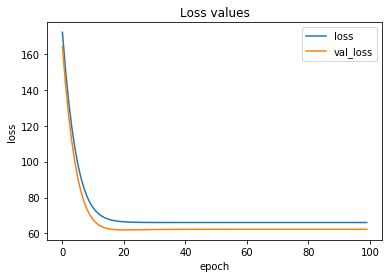

In [198]:
plt.title('Loss values')
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
print('Initial loss value :', losses[0])
print('Final loss value :', losses[-1])
print('Initial validation loss value :', val_losses[0])
print('Final validation loss value :', val_losses[-1])

**L = 0.00001 epochs = 100**

In [158]:
m = 0
c = 0
losses = []
val_losses = []

L = 0.00001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n_train = float(len(X_train)) # Number of elements in X
n_test = float(len(X_test))

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c  # The current predicted value of Y
    Y_val_pred = m*X_test + c  # The current predicted value of Y
    
    rmse = np.sqrt((1/n_train) * np.sum((Y_train - Y_pred)**2))
    losses.append(rmse)
    
    rmse_val = np.sqrt((1/n_test) * np.sum((Y_test - Y_val_pred)**2))
    val_losses.append(rmse_val)
    
    D_m = (-2/n_train) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n_train) * sum(Y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

4.531315408379622 0.16089398943891317


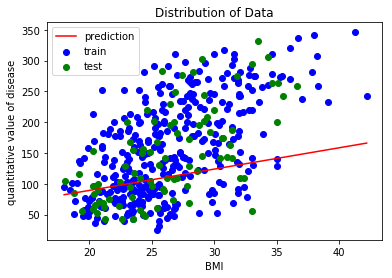

In [159]:
# Making predictions
Y_pred = m*X_test + c

plt.title('Distribution of Data')
plt.scatter(X_train, Y_train, color='blue', label='train')
plt.scatter(X_test, Y_test, color='green', label='test')
#plotting predicted line
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('quantitative value of disease')
plt.legend()
plt.show()

Initial loss value : 172.08754936337596
Final loss value : 76.27111724087962
Initial validation loss value : 164.11612085226577
Final validation loss value : 69.43487442138887


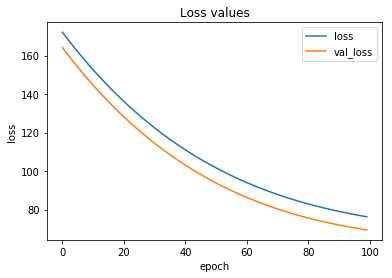

In [160]:
plt.title('Loss values')
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
print('Initial loss value :', losses[0])
print('Final loss value :', losses[-1])
print('Initial validation loss value :', val_losses[0])
print('Final validation loss value :', val_losses[-1])

**L = 0.000001 epochs = 100**

In [161]:
m = 0
c = 0
losses = []
val_losses = []

L = 0.000001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n_train = float(len(X_train)) # Number of elements in X
n_test = float(len(X_test))

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c  # The current predicted value of Y
    Y_val_pred = m*X_test + c  # The current predicted value of Y
    
    rmse = np.sqrt((1/n_train) * np.sum((Y_train - Y_pred)**2))
    losses.append(rmse)
    
    rmse_val = np.sqrt((1/n_test) * np.sum((Y_test - Y_val_pred)**2))
    val_losses.append(rmse_val)
    
    D_m = (-2/n_train) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n_train) * sum(Y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.7925183874452715 0.028603336810568213


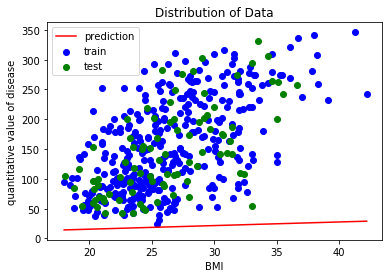

In [162]:
# Making predictions
Y_pred = m*X_test + c

plt.title('Distribution of Data')
plt.scatter(X_train, Y_train, color='blue', label='train')
plt.scatter(X_test, Y_test, color='green', label='test')
#plotting predicted line
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('quantitative value of disease')
plt.legend()
plt.show()

Initial loss value : 172.08754936337596
Final loss value : 152.88316397190326
Initial validation loss value : 164.11612085226577
Final validation loss value : 144.88910689840117


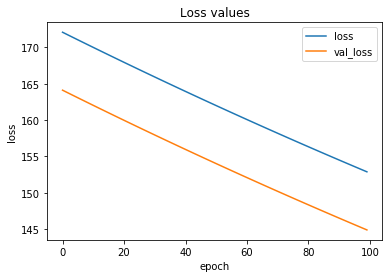

In [163]:
plt.title('Loss values')
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
print('Initial loss value :', losses[0])
print('Final loss value :', losses[-1])
print('Initial validation loss value :', val_losses[0])
print('Final validation loss value :', val_losses[-1])

**L = 0.000001 epochs = 1000**

In [164]:
m = 0
c = 0
losses = []
val_losses = []

L = 0.000001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n_train = float(len(X_train)) # Number of elements in X
n_test = float(len(X_test))

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c  # The current predicted value of Y
    Y_val_pred = m*X_test + c  # The current predicted value of Y
    
    rmse = np.sqrt((1/n_train) * np.sum((Y_train - Y_pred)**2))
    losses.append(rmse)
    
    rmse_val = np.sqrt((1/n_test) * np.sum((Y_test - Y_val_pred)**2))
    val_losses.append(rmse_val)
    
    D_m = (-2/n_train) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n_train) * sum(Y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

4.518173234011086 0.1604094095587833


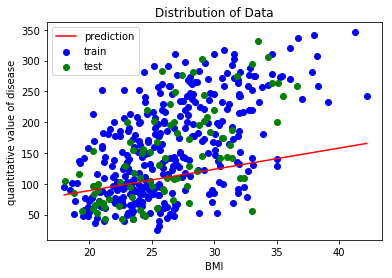

In [165]:
# Making predictions
Y_pred = m*X_test + c

plt.title('Distribution of Data')
plt.scatter(X_train, Y_train, color='blue', label='train')
plt.scatter(X_test, Y_test, color='green', label='test')
#plotting predicted line
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('quantitative value of disease')
plt.legend()
plt.show()

Initial loss value : 172.08754936337596
Final loss value : 76.20183102084518
Initial validation loss value : 164.11612085226577
Final validation loss value : 69.37235053289159


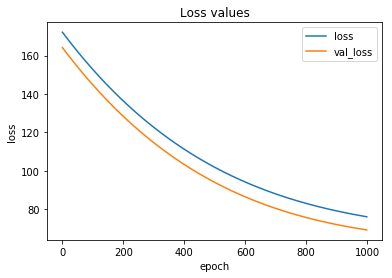

In [166]:
plt.title('Loss values')
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
print('Initial loss value :', losses[0])
print('Final loss value :', losses[-1])
print('Initial validation loss value :', val_losses[0])
print('Final validation loss value :', val_losses[-1])

## **Step 5: Prediction of Values**

Prediction example 1:

In [193]:
Y_pred = m * X_test[100] + c
print("Predicted value is", Y_pred)
print("Actual value is", Y_test[100])

Predicted value is 126.66925996186919
Actual value is 128


Prediction example 2:

In [195]:
Y_pred = m * X_test[392] + c
print("Predicted value is", Y_pred)
print("Actual value is", Y_test[392])

Predicted value is 106.78929773222042
Actual value is 118


Prediction example 3:

In [188]:
Y_pred = m * X_test[120] + c
print("Predicted value is", Y_pred)
print("Actual value is", Y_test[120])

Predicted value is 121.2474520810559
Actual value is 200
